In [1]:
import numpy as np
from collections import deque
from copy import deepcopy

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
colours = {'.':np.array([232,236,251]), '#':np.array([66,21,10]),
           'O':np.array([78,178,101]), 'X':np.array([220,5,12])}

In [3]:
def get_graph(data, size, time):
    graph = np.full((size+1,size+1), '.')
    
    if time > len(data):
        time = len(data)
            
    for i in range(0, time):
        line = data[i].strip()
        y, x = line.split(',')
        graph[int(x)][int(y)] = '#'
        
    return graph

def not_in_graph(graph, pos):
    if pos[0] < 0 or pos[0] >= len(graph):
        return True
    if pos[1] < 0 or pos[1] >= len(graph[pos[0]]):
        return True
    return False

def BFS(graph, start, end):
    dxdy = [[-1,0],[0,1],[1,0],[0,-1]]
    queue = deque([start])
    
    dist = {start:0}
    
    while len(queue):
        cur_pos = queue.popleft()
        cur_dst = dist[cur_pos]
        
        for xy in dxdy:
            nxt_pos = (cur_pos[0]+xy[0], cur_pos[1]+xy[1])
            if not_in_graph(graph, nxt_pos):
                continue
            elif graph[nxt_pos[0]][nxt_pos[1]] == '#':
                continue
                
            nxt_dst = cur_dst + 1
            if nxt_pos in dist.keys():
                if nxt_dst < dist[nxt_pos]:
                    dist[nxt_pos] = nxt_dst
                    queue.append(nxt_pos)
            else:
                dist[nxt_pos] = nxt_dst
                queue.append(nxt_pos)
                
    return dist

def DFS(graph, cur_pos, cur_dst, end, path):
    dxdy = [[-1,0],[0,1],[1,0],[0,-1]]
    path.append(cur_pos)
    
    if cur_pos == end:
        return path
    cur_path = deepcopy(path)
    
    for xy in dxdy:
        nxt_pos = (cur_pos[0]+xy[0], cur_pos[1]+xy[1])
        if nxt_pos not in graph.keys():
            continue
        elif nxt_pos in cur_path:
            continue
            
        nxt_dst = graph[nxt_pos]
        if nxt_dst != cur_dst - 1:
            continue
        
        path = DFS(graph, nxt_pos, nxt_dst, end, deepcopy(cur_path))
        
        if path[-1] == end:
            return path
    
    return path

def draw_path(graph, path):
    for p in path:
        graph[p[0],p[1]] = 'O'
    return graph

def erase_path(graph, path):
    for p in path:
        graph[p[0],p[1]] = '.'
    return graph

def key_frame(graph):
    image = np.ones((graph.shape[0],graph.shape[1],3), dtype=int)
    for x in range(0, len(graph)):
        for y in range(0, len(graph[x])):
            image[x,y] = colours[graph[x,y]]
    return image

def save_frame(image, frame_num):
    frame = Image.fromarray(image.astype('uint8'), mode='RGB')
    frame = frame.resize((frame.size[0]*8,frame.size[1]*8), resample=Image.NEAREST)
    frame.save('./Day18-Frames/day18_'+str(frame_num).zfill(5)+'.png')

def run(data, size, time):
    for i in range(0, len(data)):
        data[i] = data[i].strip()
    data = np.array(data)
    
    graph = get_graph(data, size, time)
    dist = BFS(graph, (0,0), (size,size))
    
    path = DFS(dist, (size,size), dist[(size,size)], (0,0), [])
    graph = draw_path(graph, path)
    
    image = key_frame(graph)
    save_frame(image, 0)
    
    for i in range(0, len(data)):
        y, x = data[i].split(',')
        x = int(x)
        y = int(y)
        
        if graph[x,y] == 'O':
            graph = erase_path(graph, path)
            graph[x,y] = '#'
            dist = BFS(graph, (0,0), (size,size))
            if (size,size) in dist.keys():
                path = DFS(dist, (size,size), dist[(size,size)], (0,0), [])
                graph = draw_path(graph, path)
            else:
                graph[x,y] = 'X'
            image = key_frame(graph)
        else:
            graph[x,y] = '#'
            image[x,y] = colours['#']
            
        save_frame(image, i+1)
        
    plt.imshow(image)
    plt.show()

Part 1 result: 140


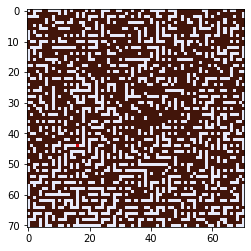

In [4]:
with open('input_day18.txt', 'r') as f:
    data = f.readlines()
    f.close()
    
run(data, 70, 0)